In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [192]:
X=pd.read_csv("../data/Genes/data.csv")

In [193]:
y=pd.read_csv("../data/Genes/labels.csv")

In [194]:
X.shape

(801, 20532)

In [195]:
X=X.iloc[:,1:]

In [196]:
y=y.iloc[:,1:]

In [197]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB


In [198]:
np.flatnonzero(np.sum(pd.isnull(X))>0)

array([], dtype=int64)

In [199]:
np.flatnonzero(X.std()==0)

array([    5,    23,  4370,  4808,  4809,  4814,  4816,  4817,  4831,
        5288,  7661,  7662,  7663,  7664,  7665,  8121,  9304,  9306,
        9314,  9316,  9320,  9452, 10121, 11958, 13991, 14158, 14159,
       14161, 15138, 15140, 15141, 15446, 16566, 16568, 16569, 16571,
       16575, 16578, 16579, 16604, 16634, 16637, 16677, 16697, 16698,
       16699, 16700, 16701, 16702, 16704, 16705, 16706, 16707, 16708,
       16709, 16710, 16711, 16712, 16713, 16714, 16715, 16716, 16717,
       16718, 16719, 16720, 16721, 16722, 16723, 16724, 16725, 16726,
       16727, 16728, 16729, 16730, 16731, 16732, 16733, 16734, 16735,
       16736, 16737, 16738, 16739, 16740, 16741, 16742, 16743, 16744,
       16745, 16746, 16748, 16749, 16750, 16751, 16752, 16753, 16754,
       16756, 16757, 16758, 16759, 16760, 16761, 16762, 16763, 16764,
       16765, 16766, 16767, 16768, 16769, 16770, 16771, 16772, 16774,
       16775, 16776, 16777, 16778, 16779, 16780, 16781, 16782, 16783,
       16785, 16787,

In [200]:
X=X.drop(X.std()[X.std()==0].index.values,axis=1)

In [201]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [202]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])

In [203]:
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

In [204]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

In [205]:
categorical_features = X.select_dtypes(include=['object']).columns

In [206]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
]) 

In [207]:
from IPython.display import Image
Image(url= "../data/Genes/clus.png")

In [208]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans


In [209]:
range_n_clusters = [3, 4, 5, 6, 7, 8]

In [222]:
for i in [2,10,20,30]:
    pca = PCA(n_components=i)
    X_pca=pca.fit_transform(X)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, cluster_labels)
        print(
        "var =",
        i,
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    

var = 2 For n_clusters = 3 The average silhouette_score is : 0.5530074890817759
var = 2 For n_clusters = 4 The average silhouette_score is : 0.6084783348829393
var = 2 For n_clusters = 5 The average silhouette_score is : 0.6101318876677747
var = 2 For n_clusters = 6 The average silhouette_score is : 0.5438945708016913
var = 2 For n_clusters = 7 The average silhouette_score is : 0.498569488203177
var = 2 For n_clusters = 8 The average silhouette_score is : 0.472651632430514
var = 10 For n_clusters = 3 The average silhouette_score is : 0.35273136636936125
var = 10 For n_clusters = 4 The average silhouette_score is : 0.4143766934487657
var = 10 For n_clusters = 5 The average silhouette_score is : 0.4593982677865153
var = 10 For n_clusters = 6 The average silhouette_score is : 0.46590769285922456
var = 10 For n_clusters = 7 The average silhouette_score is : 0.4088238258181363
var = 10 For n_clusters = 8 The average silhouette_score is : 0.40938146585115837
var = 20 For n_clusters = 3 The a

In [211]:
for i in [100,300,400,800]:
    kpca = KernelPCA(n_components=i,kernel="poly")
    Xk_pca=kpca.fit_transform(X)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(Xk_pca)
        silhouette_avg = silhouette_score(Xk_pca, cluster_labels)
        print(
        "var =",
        i,
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        
    )
    kpca = KernelPCA()
    

var = 100 For n_clusters = 3 The average silhouette_score is : 0.23115373903229203
var = 100 For n_clusters = 4 The average silhouette_score is : 0.2704956871725011
var = 100 For n_clusters = 5 The average silhouette_score is : 0.30512874038028065
var = 100 For n_clusters = 6 The average silhouette_score is : 0.30352742035442365
var = 100 For n_clusters = 7 The average silhouette_score is : 0.2592440936549443
var = 100 For n_clusters = 8 The average silhouette_score is : 0.21641631092719327
var = 300 For n_clusters = 3 The average silhouette_score is : 0.19167566298538677
var = 300 For n_clusters = 4 The average silhouette_score is : 0.22823910837174194
var = 300 For n_clusters = 5 The average silhouette_score is : 0.2582856503242432
var = 300 For n_clusters = 6 The average silhouette_score is : 0.2627129437205713
var = 300 For n_clusters = 7 The average silhouette_score is : 0.21551609762042273
var = 300 For n_clusters = 8 The average silhouette_score is : 0.17131945506368776
var = 40

In [212]:
for i in [100,300,400,800]:
    anova = SelectKBest(f_classif,k=i)
    X_anova=anova.fit_transform(X,np.ravel(y))
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_anova)
        silhouette_avg = silhouette_score(X_anova, cluster_labels)
        print(
        "var =",
        i,
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        
    )

var = 100 For n_clusters = 3 The average silhouette_score is : 0.5064205945460218
var = 100 For n_clusters = 4 The average silhouette_score is : 0.5368883333065885
var = 100 For n_clusters = 5 The average silhouette_score is : 0.6095942918052862
var = 100 For n_clusters = 6 The average silhouette_score is : 0.5441775866276792
var = 100 For n_clusters = 7 The average silhouette_score is : 0.33120226331661395
var = 100 For n_clusters = 8 The average silhouette_score is : 0.29598799473887544
var = 300 For n_clusters = 3 The average silhouette_score is : 0.42720310677905476
var = 300 For n_clusters = 4 The average silhouette_score is : 0.4787021422158912
var = 300 For n_clusters = 5 The average silhouette_score is : 0.5286998913568245
var = 300 For n_clusters = 6 The average silhouette_score is : 0.46003096746848376
var = 300 For n_clusters = 7 The average silhouette_score is : 0.35269837652929226
var = 300 For n_clusters = 8 The average silhouette_score is : 0.30986978155650746
var = 400 

In [213]:
from sklearn.decomposition import PCA

In [214]:
pca = PCA(n_components=2)

In [215]:
X_pca=pca.fit_transform(X)

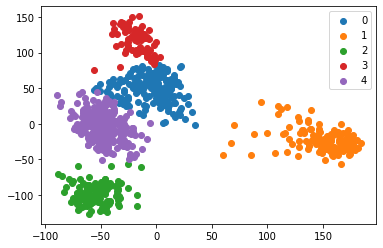

In [221]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X_pca)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
    plt.legend()